In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

## Loading MNIST Dataset

In [5]:
(X_tn, y_train), (X_tt, y_test) = mnist.load_data()

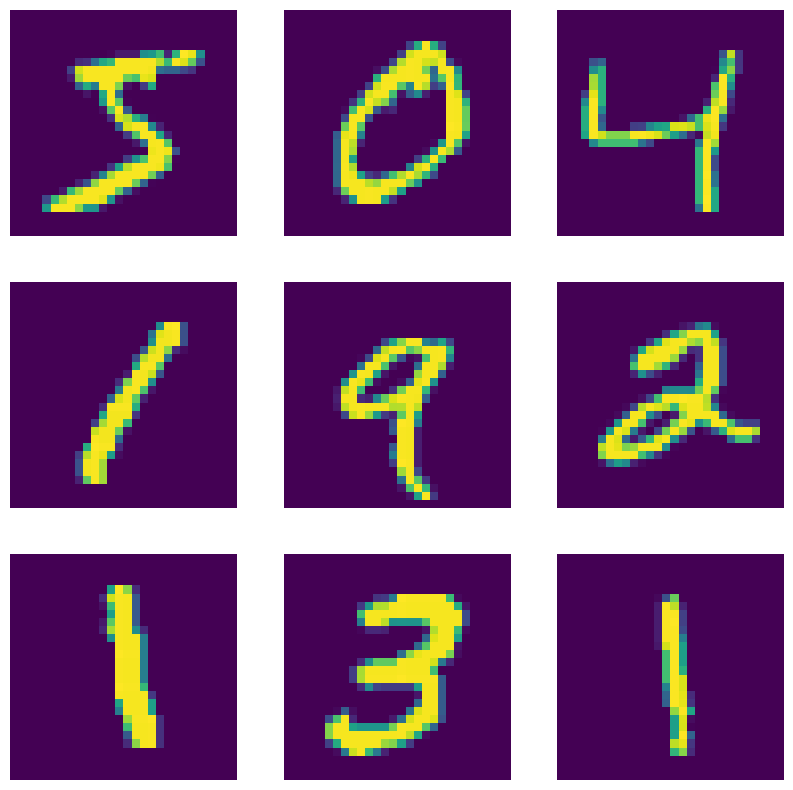

In [7]:
plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(X_tn[i])
    plt.axis('off')

## Reshape the data to fit the model

In [10]:
X_train = X_tn.reshape(-1, 28 * 28)
X_test = X_tt.reshape(-1, 28 * 28)

## Normalize the pixel values

In [13]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

## One-Hot Encoding of Labels

In [16]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Building the Model

In [19]:
model = Sequential([
    Dense(512, input_shape=(28*28,), activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])

/home/se00n00/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1727548204.300848   28489 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-29 00:00:04.304169: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform

In [21]:
model.fit(X_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8716 - loss: 0.4337
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9732 - loss: 0.0899
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9826 - loss: 0.0551
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9871 - loss: 0.0396
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9910 - loss: 0.0277
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9920 - loss: 0.0240
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9936 - loss: 0.0188
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9936 - loss: 0.0178
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9952 - loss: 0.0135
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9946 - loss: 0.0152


## Model Evaluation

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.0993


In [26]:
print(f"Accuracy : {accuracy*100:0.2f} \nLoss : {loss}")

Accuracy : 97.91 
Loss : 0.08238591998815536


In [28]:
Pred_test = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


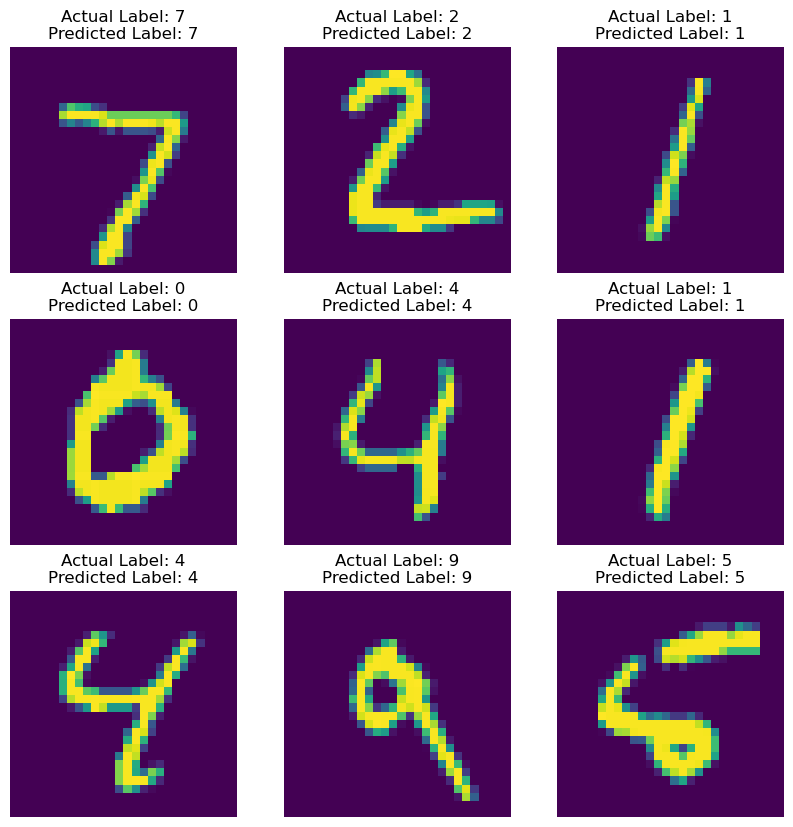

In [30]:
plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.title(f"Actual Label: {np.argmax(y_test[i])}\nPredicted Label: {np.argmax(Pred_test[i])}")
    plt.imshow(X_tt[i])
    plt.axis('off')

## Visuallizing Weights

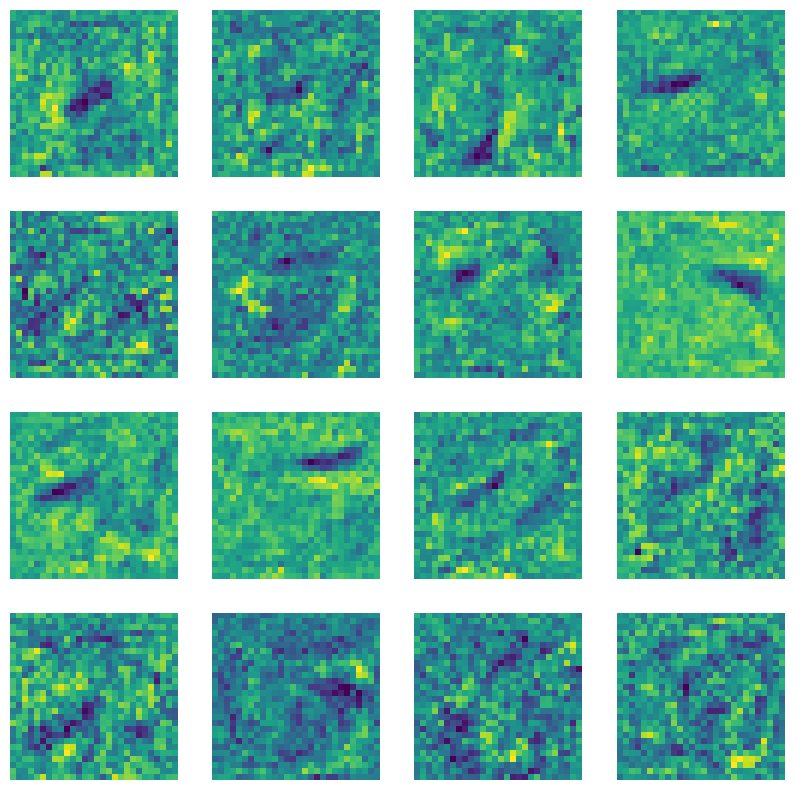

In [33]:
first_layer_weights = model.layers[0].get_weights()[0]

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    weight_image = first_layer_weights[:, i].reshape(28, 28)
    plt.imshow(weight_image)
    plt.axis('off')
plt.show()

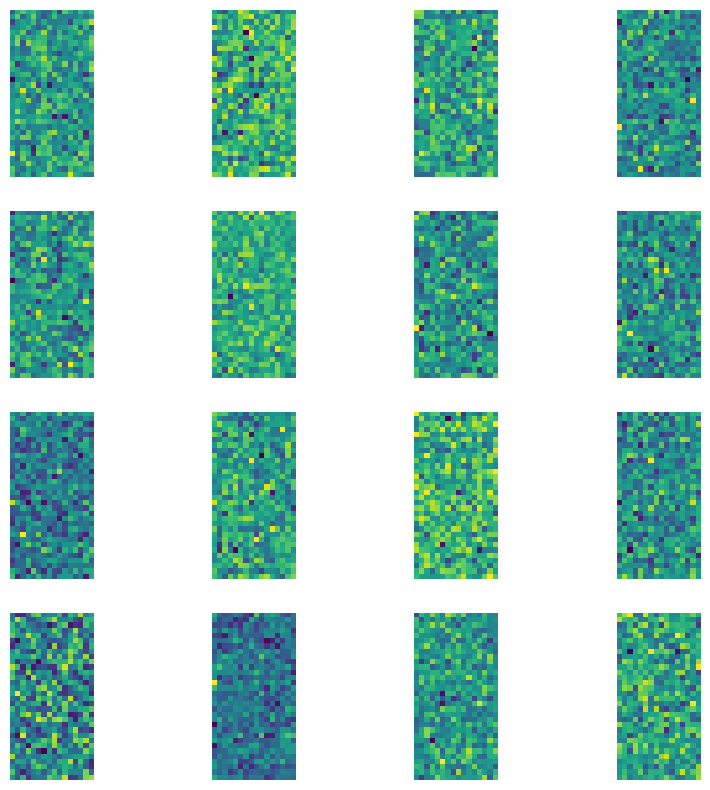

In [35]:
second_layer_weights = model.layers[1].get_weights()[0]

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    weight_image = second_layer_weights[:, i].reshape(32, 16)
    plt.imshow(weight_image)
    plt.axis('off')
plt.show()

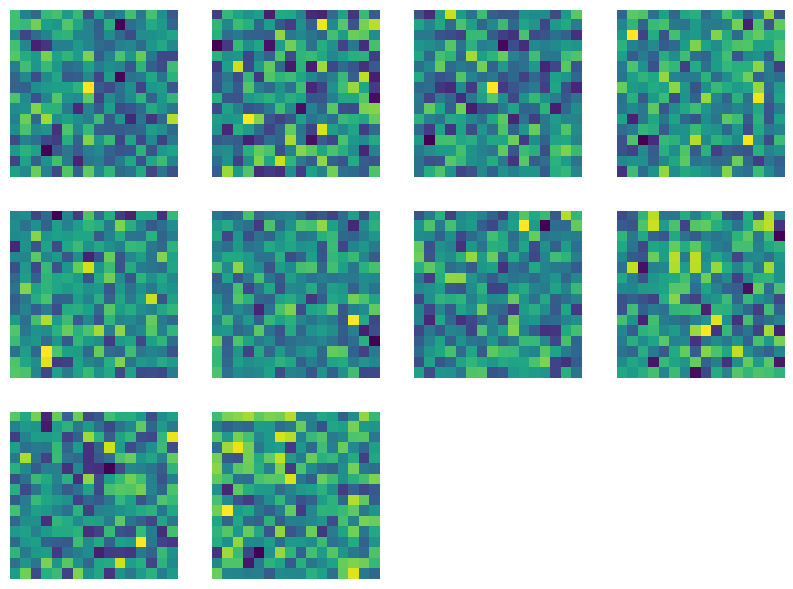

In [37]:
Third_layer_weights = model.layers[2].get_weights()[0]

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(4, 4, i+1)
    weight_image = Third_layer_weights[:, i].reshape(16, 16)
    plt.imshow(weight_image)
    plt.axis('off')
plt.show()

## Saving the model

In [40]:
model.save('MNIST_DIGITS_FFD_MODEL.keras')